<div style="padding: -5px;
  text-align: center;
  color: white;
  font-size: 15px;">
   <img src="images/banner.jpg" alt="MINE-Seminario de programación" style="width:100%;">
  <h1 style="
  position: absolute;
  top: 5%;
  left: 50%;">Caso de Estudio</h1>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploración-datos" data-toc-modified-id="Exploración-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploración datos</a></span></li><li><span><a href="#Nivel-de-obesidad" data-toc-modified-id="Nivel-de-obesidad-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nivel de obesidad</a></span></li><li><span><a href="#Exploración-Previa---Solo-cuantitativa" data-toc-modified-id="Exploración-Previa---Solo-cuantitativa-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploración Previa - Solo cuantitativa</a></span></li><li><span><a href="#Exploración-Total" data-toc-modified-id="Exploración-Total-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploración Total</a></span></li><li><span><a href="#Aprendizaje-Supervisado" data-toc-modified-id="Aprendizaje-Supervisado-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Aprendizaje Supervisado</a></span></li><li><span><a href="#Infome-Final" data-toc-modified-id="Infome-Final-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Infome Final</a></span></li></ul></div>

#  Nivel de obesidad

En el siguiente enlace encontrarán una base de datos que permiten estimarlos niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros, además, hay una variable `NObesidad` (Nivel de obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Nivel de Sobrepeso I, Nivel de Sobrepeso II, Obesidad Tipo I , Obesidad tipo II y Obesidad tipo III. El 77% de los datos se generaron sintéticamente utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recopilaron directamente de los usuarios a través de una plataforma web, la información acerca de los datos y los paper relevantes que se han creado a partir de este ejercicio lo pueden encontrar en:

[ Estimation of obesity levels based on eating habits and physical condition Data Set ](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)



Este ejercicio guiado pretende que ustedes hagan una exploración completa a la base, identifiquen grupos en la población y desarrolen modelos que permitan determinar el nivel de obesidad para cualquier individuo.

Después de descargar, cargamos la base:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [2]:
data.columns=data.columns.str.lower()

In [3]:
data.head(4)

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I


In [4]:
data.rename(columns={'family_history_with_overweight':'family'},inplace=True)

In [10]:
### frecuencia de la actividad fisica
## por dias 0 no hay
### 1 1-2 dias
## 2 2-4 dias
## 3 4-5 dias
pd.crosstab(data.nobeyesdad,data.faf,normalize=True,margins=True)

faf,0,1,2,3,All
nobeyesdad,,,,,
Insufficient_Weight,0.051634,0.030317,0.045002,0.001895,0.128849
Normal_Weight,0.037897,0.045950,0.032686,0.019422,0.135955
Obesity_Type_I,0.083373,0.054003,0.022738,0.006158,0.166272
Obesity_Type_II,0.070583,0.067740,0.002369,0.000000,0.140692
Obesity_Type_III,0.098058,0.054950,0.000474,0.000000,0.153482
Overweight_Level_I,0.066793,0.042160,0.023685,0.004737,0.137376
Overweight_Level_II,0.070583,0.047845,0.015632,0.003316,0.137376
All,0.478920,0.342965,0.142586,0.035528,1.000000


In [6]:
### seguimiento de calorias
pd.crosstab(data.nobeyesdad,data.scc,normalize=True,margins=True)

scc,no,yes,All
nobeyesdad,,,
Insufficient_Weight,0.118427,0.010422,0.128849
Normal_Weight,0.121743,0.014211,0.135955
Obesity_Type_I,0.165324,0.000947,0.166272
Obesity_Type_II,0.140218,0.000474,0.140692
Obesity_Type_III,0.153482,0.000000,0.153482
Overweight_Level_I,0.119848,0.017527,0.137376
Overweight_Level_II,0.135481,0.001895,0.137376
All,0.954524,0.045476,1.000000


In [7]:
### familia con problemas 
pd.crosstab(data.nobeyesdad,data.family,normalize=True,margins=True)

family,no,yes,All
nobeyesdad,,,
Insufficient_Weight,0.069162,0.059687,0.128849
Normal_Weight,0.062530,0.073425,0.135955
Obesity_Type_I,0.003316,0.162956,0.166272
Obesity_Type_II,0.000474,0.140218,0.140692
Obesity_Type_III,0.000000,0.153482,0.153482
Overweight_Level_I,0.038370,0.099005,0.137376
Overweight_Level_II,0.008527,0.128849,0.137376
All,0.182378,0.817622,1.000000


In [8]:
## medios de transporte
pd.crosstab(data.nobeyesdad,data.mtrans,normalize=True,margins=True)

mtrans,Automobile,Bike,Motorbike,Public_Transportation,Walking,All
nobeyesdad,,,,,,
Insufficient_Weight,0.021791,0.000000,0.000000,0.104216,0.002842,0.128849
Normal_Weight,0.021317,0.001895,0.002842,0.094742,0.015159,0.135955
Obesity_Type_I,0.052108,0.000000,0.001421,0.111795,0.000947,0.166272
Obesity_Type_II,0.045002,0.000474,0.000000,0.094742,0.000474,0.140692
Obesity_Type_III,0.000474,0.000000,0.000000,0.153008,0.000000,0.153482
Overweight_Level_I,0.031265,0.000947,0.000474,0.100426,0.004263,0.137376
Overweight_Level_II,0.044529,0.000000,0.000474,0.089531,0.002842,0.137376
All,0.216485,0.003316,0.005211,0.748460,0.026528,1.000000


In [9]:
### consumo de alcohol
pd.crosstab(data.nobeyesdad,data.calc,normalize=True,margins=True)

calc,Always,Frequently,Sometimes,no,All
nobeyesdad,,,,,
Insufficient_Weight,0.000000,0.000474,0.072951,0.055424,0.128849
Normal_Weight,0.000474,0.008527,0.076267,0.050687,0.135955
Obesity_Type_I,0.000000,0.006632,0.081478,0.078162,0.166272
Obesity_Type_II,0.000000,0.000947,0.106111,0.033633,0.140692
Obesity_Type_III,0.000000,0.000000,0.153008,0.000474,0.153482
Overweight_Level_I,0.000000,0.007579,0.106111,0.023685,0.137376
Overweight_Level_II,0.000000,0.009000,0.067740,0.060635,0.137376
All,0.000474,0.033160,0.663667,0.302700,1.000000


In [10]:
### consumo de alimentos entre comida
pd.crosstab(data.nobeyesdad,data.caec,normalize=True,margins=True)

caec,Always,Frequently,Sometimes,no,All
nobeyesdad,,,,,
Insufficient_Weight,0.000947,0.057319,0.069162,0.001421,0.128849
Normal_Weight,0.016580,0.039318,0.075320,0.004737,0.135955
Obesity_Type_I,0.002842,0.002842,0.160114,0.000474,0.166272
Obesity_Type_II,0.000947,0.000474,0.138797,0.000474,0.140692
Obesity_Type_III,0.000000,0.000474,0.153008,0.000000,0.153482
Overweight_Level_I,0.002369,0.006632,0.111795,0.016580,0.137376
Overweight_Level_II,0.001421,0.007579,0.127901,0.000474,0.137376
All,0.025107,0.114638,0.836097,0.024159,1.000000


In [59]:
### tiempo de uso de dispositivos
## 0 0-2
## 1 3-5
## 3 +5
pd.crosstab(data.nobeyesdad,data.tue,normalize=True,margins=True)

tue,0,1,2,All
nobeyesdad,,,,
0,0.061108,0.057793,0.017054,0.135955
1,0.096637,0.033160,0.007579,0.137376
2,0.087636,0.044529,0.005211,0.137376
3,0.104690,0.049739,0.011843,0.166272
4,0.063003,0.056845,0.009000,0.128849
5,0.109427,0.030317,0.000947,0.140692
6,0.147797,0.005685,0.000000,0.153482
All,0.670298,0.278067,0.051634,1.000000


In [9]:
lista=['age', 'fcvc', 'ncp','ch2o', 'faf', 'tue']
for a in range(len(lista)):
    data[lista[a]]=data[lista[a]].astype(int)

In [13]:
## comidas al dia
pd.crosstab(data.nobeyesdad,data.ncp,normalize=True,margins=True)

ncp,1,2,3,4,All
nobeyesdad,,,,,
Insufficient_Weight,0.023212,0.009000,0.082899,0.013738,0.128849
Normal_Weight,0.024633,0.000000,0.097584,0.013738,0.135955
Obesity_Type_I,0.047371,0.033633,0.085268,0.000000,0.166272
Obesity_Type_II,0.015632,0.036949,0.087636,0.000474,0.140692
Obesity_Type_III,0.000000,0.000000,0.153482,0.000000,0.153482
Overweight_Level_I,0.040739,0.018948,0.073899,0.003790,0.137376
Overweight_Level_II,0.035528,0.036476,0.064424,0.000947,0.137376
All,0.187115,0.135007,0.645192,0.032686,1.000000


In [14]:
## caloricos
pd.crosstab(data.nobeyesdad,data.favc,normalize=True,margins=True)

favc,no,yes,All
nobeyesdad,,,
Insufficient_Weight,0.024159,0.104690,0.128849
Normal_Weight,0.037423,0.098532,0.135955
Obesity_Type_I,0.005211,0.161061,0.166272
Obesity_Type_II,0.003316,0.137376,0.140692
Obesity_Type_III,0.000474,0.153008,0.153482
Overweight_Level_I,0.010422,0.126954,0.137376
Overweight_Level_II,0.035054,0.102321,0.137376
All,0.116059,0.883941,1.000000


In [5]:
lista=['gender','family','caec','smoke','scc','favc']
for a in range(len(lista)):
    if lista[a]=='gender':
        data[lista[a]]=data[lista[a]].replace({'Female':0,'Male':1})
    else:
        data[lista[a]]=data[lista[a]].replace({'no':0,'yes':1})

In [6]:
base=list(data.calc.unique())
val=[a for a in range(len(data.calc.unique()))]
dicci={}
for a in range(len(val)):
    dicci[base[a]]=val[a]
print(dicci)
data['calc']=data['calc'].replace(dicci)

{'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}


In [7]:
base=list(data.caec.unique())
val=[a for a in range(len(data.caec.unique()))]
dicci={}
for a in range(len(val)):
    dicci[base[a]]=val[a]
print(dicci)
data['caec']=data['caec'].replace(dicci)

{'Sometimes': 0, 'Frequently': 1, 'Always': 2, 0: 3}


In [14]:
data.head(3)

,gender,age,height,weight,family,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,0,21,1.62,64.0,1,0,2,3,0,0,2,0,0,1,0,Public_Transportation,Normal_Weight
1,0,21,1.52,56.0,1,0,3,3,0,1,3,1,3,0,1,Public_Transportation,Normal_Weight
2,1,23,1.80,77.0,1,0,2,3,0,0,2,0,2,1,2,Public_Transportation,Normal_Weight


In [15]:
base=list(data.mtrans.unique())
val=[a for a in range(len(data.mtrans.unique()))]
dicci={}
for a in range(len(val)):
    dicci[base[a]]=val[a]
print(dicci)
data['mtrans']=data['mtrans'].replace(dicci)

{'Public_Transportation': 0, 'Walking': 1, 'Automobile': 2, 'Motorbike': 3, 'Bike': 4}


In [324]:
base=list(data.nobeyesdad.unique())
val=[a for a in range(len(data.nobeyesdad.unique()))]
dicci={}
for a in range(len(val)):
    dicci[base[a]]=val[a]
print(dicci)
data['nobeyesdad']=data['nobeyesdad'].replace(dicci)

{'Normal_Weight': 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 2, 'Obesity_Type_I': 3, 'Insufficient_Weight': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}


In [18]:
data.head(3)

,gender,age,height,weight,family,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,0,21,1.62,64.0,1,0,2,3,0,0,2,0,0,1,0,0,0
1,0,21,1.52,56.0,1,0,3,3,0,1,3,1,3,0,1,0,0
2,1,23,1.80,77.0,1,0,2,3,0,0,2,0,2,1,2,0,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      2111 non-null   int64  
 1   age         2111 non-null   int32  
 2   height      2111 non-null   float64
 3   weight      2111 non-null   float64
 4   family      2111 non-null   int64  
 5   favc        2111 non-null   int64  
 6   fcvc        2111 non-null   int32  
 7   ncp         2111 non-null   int32  
 8   caec        2111 non-null   int64  
 9   smoke       2111 non-null   int64  
 10  ch2o        2111 non-null   int32  
 11  scc         2111 non-null   int64  
 12  faf         2111 non-null   int32  
 13  tue         2111 non-null   int32  
 14  calc        2111 non-null   int64  
 15  mtrans      2111 non-null   int64  
 16  nobeyesdad  2111 non-null   int64  
dtypes: float64(2), int32(6), int64(9)
memory usage: 231.0 KB


In [27]:
data.describe()

,gender,age,height,weight,family,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,23.972525,1.701677,86.586058,0.817622,0.883941,2.213169,2.523449,0.237328,0.020843,1.712459,0.045476,0.734723,0.381336,0.731407,0.488394,3.050687
std,0.500083,6.308664,0.093305,26.191172,0.386247,0.320371,0.599397,0.830288,0.613474,0.142893,0.598760,0.208395,0.832812,0.582536,0.515498,0.868475,1.995680
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,1.630000,65.473343,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,22.000000,1.700499,83.000000,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


In [28]:
### personas por edad y sexo
pd.crosstab(data.age,data.gender)

gender,0,1
age,,
14,0,1
15,1,0
16,23,6
17,27,55
18,130,108
19,109,77
20,79,58
21,150,121
22,74,87


In [29]:
### personas que fuman por genero
pd.crosstab(data.gender,data.smoke,normalize=True,margins=True)

smoke,0,1,All
gender,,,
0,0.486973,0.007106,0.494079
1,0.492184,0.013738,0.505921
All,0.979157,0.020843,1.000000


In [30]:
### historial de personas con obesidad por genero
pd.crosstab(data.gender,data.family,normalize=True,margins=True)

family,0,1,All
gender,,,
0,0.109901,0.384178,0.494079
1,0.072477,0.433444,0.505921
All,0.182378,0.817622,1.000000


In [31]:
# fcvc frecuencia de consumo de verduras favc: frecuencia de consumo de productos altos en calorias
pd.crosstab(data.favc,data.fcvc,normalize=True,margins=True)

fcvc,1,2,3,All
favc,,,,
0,0.005685,0.065846,0.044529,0.116059
1,0.090005,0.529607,0.264330,0.883941
All,0.095689,0.595452,0.308858,1.000000


Hagan una exploración manual de la base, identifiquen las variables y los tipos de variables a las que nos enfretamos y, con su grupo, plantee unas hipótesis frente a las tareas planteadas. En lo que sigue se sugeriran algunos puntos a desarrollar en este trabajo.

- la mala alimentacion es la causa de la obesidad
- Los patrones de obseidad son heredados

## Exploración de datos

La idea en esta sección es hacer un EDA sobre la base. Es muy importante identificar datos atípicos, nulos y relaciones entre variables (colinealidad, alta correlación, etc.).

In [21]:
### datos nulos
data.isna().sum()

gender        0
age           0
height        0
weight        0
family        0
favc          0
fcvc          0
ncp           0
caec          0
smoke         0
ch2o          0
scc           0
faf           0
tue           0
calc          0
mtrans        0
nobeyesdad    0
dtype: int64

In [33]:
data.columns

Index(['gender', 'age', 'height', 'weight', 'family', 'favc', 'fcvc', 'ncp',
       'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans',
       'nobeyesdad'],
      dtype='object')

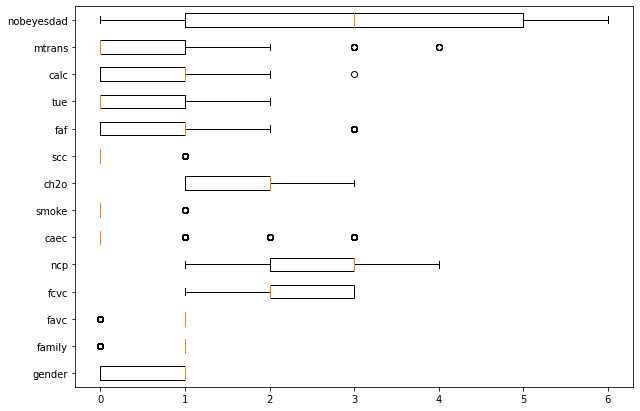

In [58]:
#import mathplotlib as plt
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating plot
plt.boxplot(data[['gender', 'family', 'favc', 'fcvc', 'ncp',
       'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans',
       'nobeyesdad']],vert=False)
ax = fig.add_subplot(111)
ax.set_yticklabels(['gender', 'family', 'favc', 'fcvc', 'ncp',
       'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans',
       'nobeyesdad'])
# show plot
plt.show()

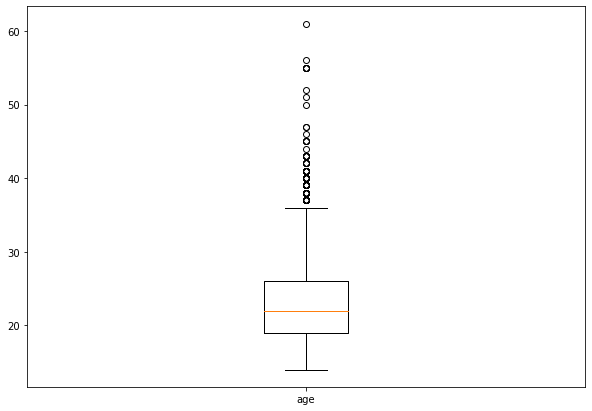

In [56]:
#import mathplotlib as plt
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data[['age']])
ax = fig.add_subplot(111)
ax.set_xticklabels(['age'])
# show plot
plt.show()

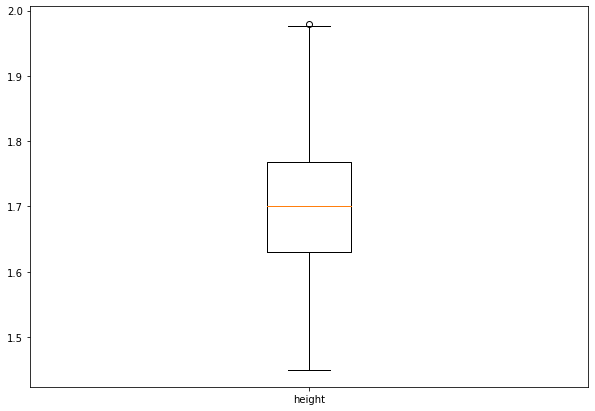

In [55]:
#import mathplotlib as plt
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data[['height']])
ax = fig.add_subplot(111)
ax.set_xticklabels(['height'])
# show plot
plt.show()

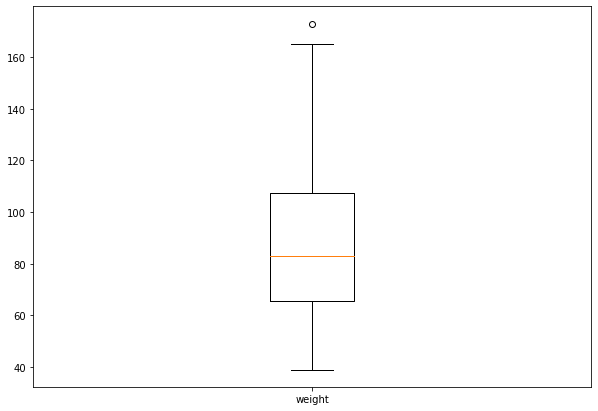

In [54]:
#import mathplotlib as plt
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data[['weight']])
ax = fig.add_subplot(111)
ax = fig.add_subplot(111)
ax.set_xticklabels(['weight'])
# show plot
plt.show()

In [38]:
data[['age', 'fcvc', 'ncp','ch2o', 'faf', 'tue','weight','height']].corr()

,age,fcvc,ncp,ch2o,faf,tue,weight,height
age,1.000000,-0.013240,-0.070632,-0.090672,-0.163307,-0.234951,0.190263,-0.030738
fcvc,-0.013240,1.000000,0.138510,0.037495,0.019344,-0.150120,0.201087,-0.070032
ncp,-0.070632,0.138510,1.000000,0.067431,0.126888,0.028048,0.126058,0.214633
ch2o,-0.090672,0.037495,0.067431,1.000000,0.266097,0.095753,0.052705,0.191061
faf,-0.163307,0.019344,0.126888,0.266097,1.000000,0.134370,-0.158726,0.234248
tue,-0.234951,-0.150120,0.028048,0.095753,0.134370,1.000000,-0.274960,-0.006181
weight,0.190263,0.201087,0.126058,0.052705,-0.158726,-0.274960,1.000000,0.463136
height,-0.030738,-0.070032,0.214633,0.191061,0.234248,-0.006181,0.463136,1.000000


In [39]:
data[['age', 'fcvc', 'ncp','ch2o', 'faf', 'tue','weight','height']].cov()

,age,fcvc,ncp,ch2o,faf,tue,weight,height
age,39.799245,-0.050065,-0.369972,-0.342501,-0.858003,-0.863451,31.437473,-0.018093
fcvc,-0.050065,0.359277,0.068933,0.013457,0.009656,-0.052418,3.156850,-0.003917
ncp,-0.369972,0.068933,0.689379,0.033523,0.087740,0.013566,2.741275,0.016628
ch2o,-0.342501,0.013457,0.033523,0.358513,0.132690,0.033399,0.826538,0.010674
faf,-0.858003,0.009656,0.087740,0.132690,0.693576,0.065189,-3.462181,0.018202
tue,-0.863451,-0.052418,0.013566,0.033399,0.065189,0.339348,-4.195144,-0.000336
weight,31.437473,3.156850,2.741275,0.826538,-3.462181,-4.195144,685.977477,1.131795
height,-0.018093,-0.003917,0.016628,0.010674,0.018202,-0.000336,1.131795,0.008706


## Nivel de obesidad

Es claro que la altura y el peso son determinantes en el Nivel de obesidad, como lo muestra el siguiente gráfico:

<AxesSubplot:xlabel='weight', ylabel='height'>

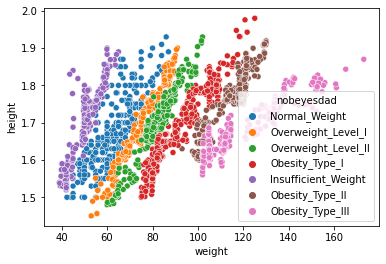

In [75]:
import seaborn as sns
sns.scatterplot(data=data,x='weight',y='height',hue='nobeyesdad')

Extraiga esas columnas de la base y haga los análisis a continuación sin tener en cuenta esas variables. Responda:

**¿Tiene sentido haber extraido esas variables? ¿Cómo afectará a mi investigación no tenerlas en cuenta?**

Tiene sentido, dado que las variables peso y estatura estan totalmente correacionadas con la variable de interes, por lo cual al usarlas en cualquier modelo lo que haria seria realizar una identidad y no podria predecir nada.

In [22]:
base1=data[['gender', 'age', 'family', 'favc', 'fcvc', 'ncp',
       'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans',
       'nobeyesdad']]

In [43]:
base1[['age', 'fcvc', 'ncp','ch2o', 'faf', 'tue']].corr()

,age,fcvc,ncp,ch2o,faf,tue
age,1.000000,-0.013240,-0.070632,-0.090672,-0.163307,-0.234951
fcvc,-0.013240,1.000000,0.138510,0.037495,0.019344,-0.150120
ncp,-0.070632,0.138510,1.000000,0.067431,0.126888,0.028048
ch2o,-0.090672,0.037495,0.067431,1.000000,0.266097,0.095753
faf,-0.163307,0.019344,0.126888,0.266097,1.000000,0.134370
tue,-0.234951,-0.150120,0.028048,0.095753,0.134370,1.000000


<AxesSubplot:>

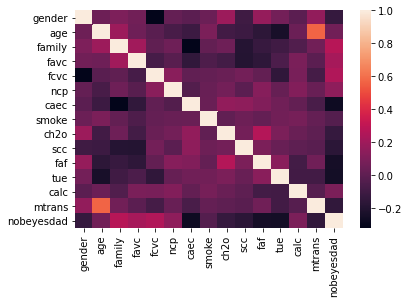

In [44]:
import seaborn as sns
sns.heatmap(base1.corr())

In [45]:
base1[['age', 'fcvc', 'ncp','ch2o', 'faf', 'tue']].cov()

,age,fcvc,ncp,ch2o,faf,tue
age,39.799245,-0.050065,-0.369972,-0.342501,-0.858003,-0.863451
fcvc,-0.050065,0.359277,0.068933,0.013457,0.009656,-0.052418
ncp,-0.369972,0.068933,0.689379,0.033523,0.087740,0.013566
ch2o,-0.342501,0.013457,0.033523,0.358513,0.132690,0.033399
faf,-0.858003,0.009656,0.087740,0.132690,0.693576,0.065189
tue,-0.863451,-0.052418,0.013566,0.033399,0.065189,0.339348


## Exploración Previa - Solo cuantitativa

1. Tomen las variables cuantitativas y determinen agrupamientos en la base de datos. No olviden fijar una semilla para la revisión del trabajo. No duden en usar métodos que permitan determinar un valor adecuado de agrupamientos.

In [46]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import warnings
import numpy as np
warnings.filterwarnings('ignore')


In [76]:
X=data[['gender', 'family', 'favc', 'fcvc', 'ncp',
       'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans']]

In [77]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
X.mean(axis=0)

----------------------
Media de cada variable
----------------------


gender    0.505921
family    0.817622
favc      0.883941
fcvc      2.213169
ncp       2.523449
caec      0.237328
smoke     0.020843
ch2o      1.712459
scc       0.045476
faf       0.734723
tue       0.381336
calc      0.731407
mtrans    0.488394
dtype: float64

In [78]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
X.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


gender    0.250083
family    0.149187
favc      0.102638
fcvc      0.359277
ncp       0.689379
caec      0.376350
smoke     0.020418
ch2o      0.358513
scc       0.043429
faf       0.693576
tue       0.339348
calc      0.265738
mtrans    0.754249
dtype: float64

In [79]:
#pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe = make_pipeline(PCA())

pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

2. Es importante generar visualizaciones adecuadas de los datos luego tendrán que poner cada registro en un plano cartesiano. Usen reducciones de dimensionalidad.

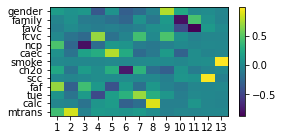

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(len(X.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

[0.19600439 0.1733144  0.15173246 0.09605989 0.08792211 0.07416993
 0.06577682 0.05536057 0.0387295  0.0277903  0.01972982 0.0089054
 0.0045044 ]


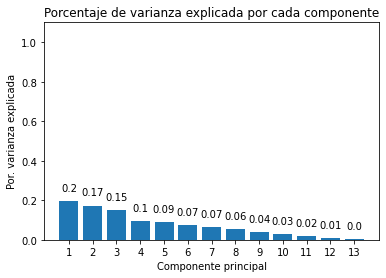

In [81]:
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.19600439 0.36931879 0.52105125 0.61711114 0.70503325 0.77920319
 0.84498001 0.90034058 0.93907008 0.96686038 0.9865902  0.9954956
 1.        ]


<module 'matplotlib.pyplot' from 'C:\\Users\\jsaj_\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

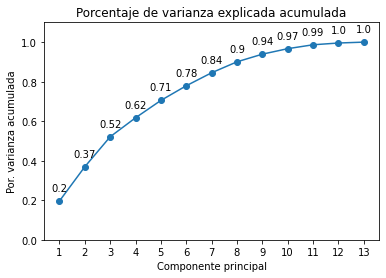

In [82]:
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt

https://www.cienciadedatos.net/documentos/py19-pca-python.html

3. Concluyan a partir de los resultados.

De lo anterior usando el metodo de PCA tenemos que con 11 componentes se puede explicar el 90% de los datos acumulados, seguido a que la variable edad es la que más varianza y media tiene por lo que se tuvo que estandarizar las variables. 

Si se decide omitir esta variable(**Edad**) se puede obtener mejores resultados reduciendo los componentes de 11 a 8, teniendo una mejor explicacion y sumado a que en cada componente se ve una clara influencia de algunas variables, como se ve en el mapa de calor de la primera gráfica.

## Aprendizaje Supervisado

En esta sección crearemos modelos que permitan responder la pregunta inicial:

1. Particionan la base en 2 (Entrenamiento y testeo) (80/20) de nuevo con semilla fija.

In [5]:
#!pip install --upgrade tensorflow

In [4]:
#!pip install keras

In [17]:
### redes
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

### random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split,RepeatedKFold,GridSearchCV,ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
### regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
#### variables de validacion

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score,accuracy_score,roc_auc_score,roc_curve,RocCurveDisplay,auc

In [36]:
X=data[['gender', 'age', 'family', 'favc', 'fcvc', 'ncp',
       'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans']]
Y=data[['nobeyesdad']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=100)
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(1688, 14) (1688, 1) (423, 14) (423, 1)


2. Usando la base de entrenamiento crearán algunos modelos de clasificación con los siguientes métodos:

* Regresión Logística
* Arboles de decisión
* Red neuronal

### regresion logistica

In [50]:
logistica=LogisticRegression(max_iter=100,solver='liblinear',random_state=29)

In [42]:
#y_train=y_train.to_numpy().ravel()

In [51]:
logistica.fit(X_train,y_train)

C:\Users\jsaj_\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=29, solver='liblinear')

In [52]:
logistica.coef_

array([[-0.21624267, -0.04789551, -1.14650879, -0.70200285,  0.31341857,
         0.24704799,  0.66117133,  0.76012871, -0.03951472, -0.11710802,
         0.49787513,  0.66045403, -0.10109532,  0.30267332],
       [-0.22808226, -0.05360182, -0.18529232,  0.7090438 , -0.67868692,
        -0.36353064,  0.27627301, -1.15513933,  0.28722626,  1.43641406,
         0.0116967 , -0.2990002 ,  0.78053216,  0.26682682],
       [ 0.51671684,  0.07320767,  1.21876005, -1.95353017, -0.4185502 ,
        -0.46230619, -0.51938268, -0.42039295,  0.10880751, -0.50883128,
        -0.1912009 ,  0.22019681, -0.21809867, -0.06001465],
       [-0.28419608,  0.01562135,  1.77997899,  1.24834223, -0.87667543,
        -0.54691889, -0.68636306,  0.25822526,  0.47506825, -1.34229532,
        -0.01621812,  0.22059183, -0.57491249,  0.10481197],
       [-0.41925044, -0.24244067, -1.71637042,  0.29518249,  0.20302942,
         0.46684781,  0.40045355, -0.75618321, -0.49050438, -0.62622712,
        -0.02212782,  0.36

In [67]:
a=logistica.predict(X_train).tolist()
b=y_train.values.ravel().tolist()

In [73]:
pd.DataFrame([b,a],columns=y_train.index,index=['Real','Predicho'])

,2031,97,864,1955,561,228,1956,241,1626,1919,...,1550,1602,53,1890,1972,350,1930,79,1859,1544
Real,6,4,1,6,4,2,6,1,5,6,...,5,5,0,6,6,0,6,0,6,5
Predicho,6,0,5,6,4,2,6,4,5,6,...,5,5,0,6,6,0,6,2,6,5


In [74]:
logistica.score(X_train,y_train)

0.5657582938388626

In [76]:
logistica.score(X_test,y_test)

0.5555555555555556

In [77]:
print(classification_report(y_test,logistica.predict(X_test)))

              precision    recall  f1-score   support

           0       0.34      0.28      0.31        50
           1       0.58      0.31      0.40        61
           2       0.58      0.24      0.34        62
           3       0.50      0.53      0.52        75
           4       0.44      0.51      0.47        49
           5       0.48      0.92      0.63        53
           6       0.88      1.00      0.94        73

    accuracy                           0.56       423
   macro avg       0.54      0.54      0.51       423
weighted avg       0.56      0.56      0.53       423



In [78]:
CM=confusion_matrix(y_test,logistica.predict(X_test))
CM

array([[14,  5,  3,  3, 20,  3,  2],
       [ 6, 19,  2, 19,  3, 10,  2],
       [ 4,  3, 15, 14,  2, 24,  0],
       [ 3,  2,  4, 40,  7, 14,  5],
       [14,  4,  0,  2, 25,  3,  1],
       [ 0,  0,  2,  2,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  0, 73]], dtype=int64)

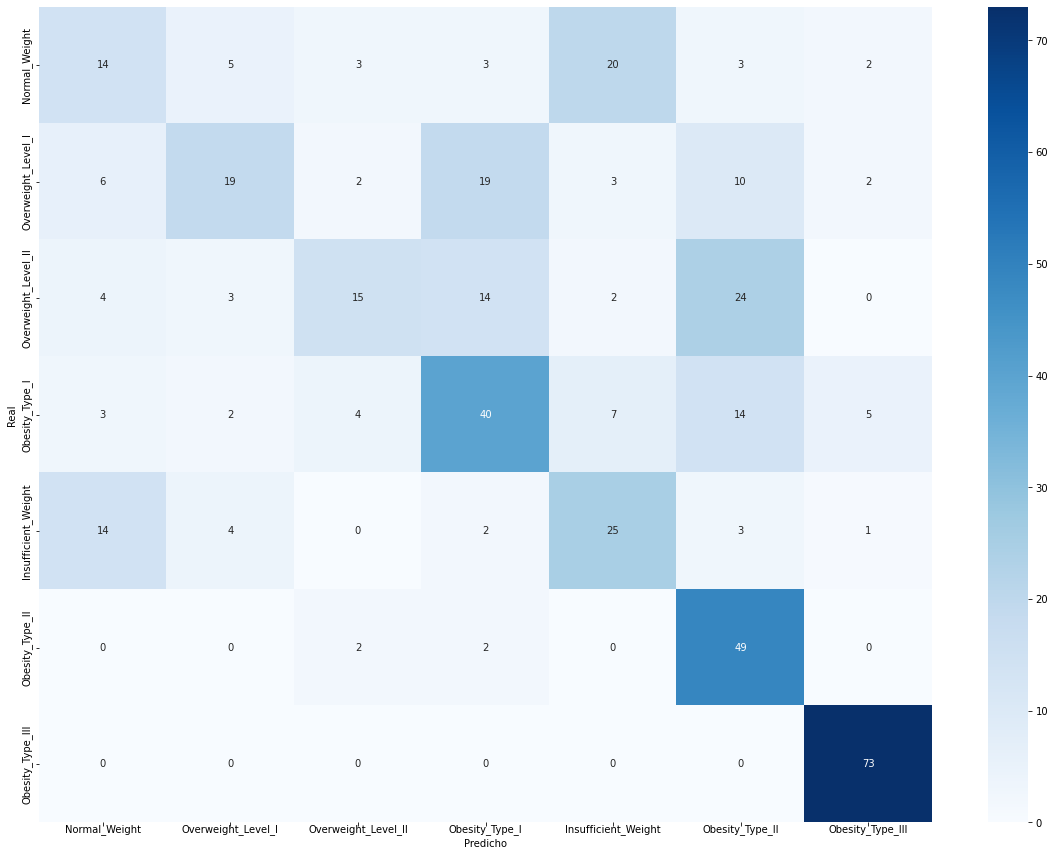

In [91]:
labels=['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III']
plt.figure(figsize=(20,15))
sns.heatmap(CM,annot=True,cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.xticks([0.5+a for a in range(7)],labels,va='center')
plt.yticks([0.5+a for a in range(7)],labels,va='center')
plt.show()

In [105]:
Y_pred_prob=logistica.predict_proba(X_test)

Prob=pd.DataFrame(Y_pred_prob,columns=['0','1','2','3','4','5','6'])
Prob['Result']=logistica.predict(X_test)
Y_testeo_dummy=pd.get_dummies(y_test.nobeyesdad.tolist())

In [107]:
fpr, tpr, umbrales=roc_curve(Y_testeo_dummy[0],Y_pred_prob[:,0])

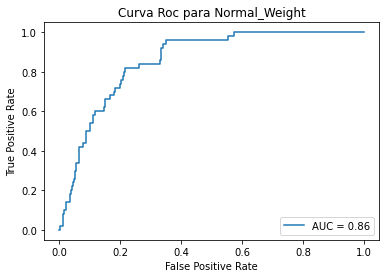

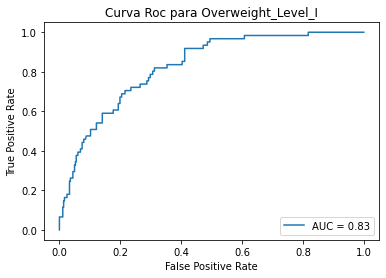

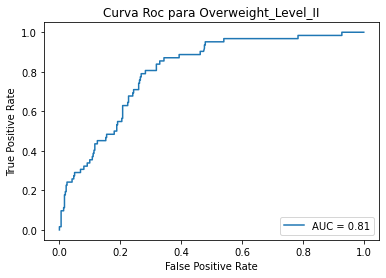

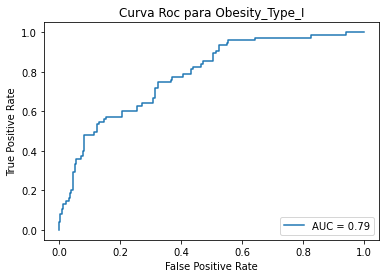

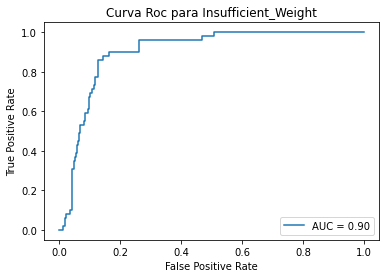

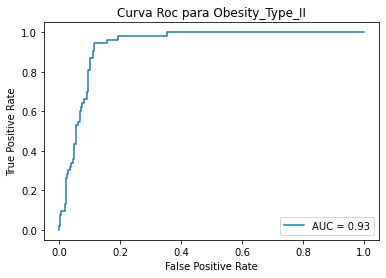

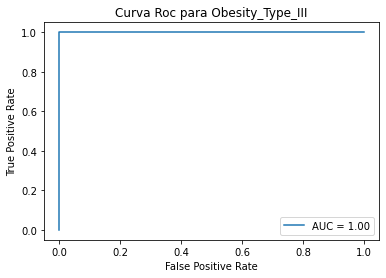

In [117]:
osd=['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III']
for i in range(7):
    fpr, tpr, umbrales=roc_curve(Y_testeo_dummy[i],Y_pred_prob[:,i])
    AUC=auc(fpr,tpr)
    display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=AUC)
    display.plot()
    plt.title('Curva Roc para '+osd[i])
plt.show()

In [200]:
predicciones = logistica.predict(X = X_test)
rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
rmse


1.9024682238580486

In [201]:
r2_score(y_test,predicciones)

0.0833529133675488

### random forest

In [133]:
y_train1=y_train.to_numpy().ravel()

In [135]:
model=RandomForestRegressor(
                        random_state        = 100
                    )
param_grid = {
              'n_estimators'      : [100,150,200,250],
              'min_samples_split' : [2,3,4,5,6,7],
              'max_depth'         : [4,5,6,7,8],
              'min_samples_leaf'  : [2,3,4,5,6,7],
              'max_features'      : ['auto','sqrt', 'log2']
             }

grid = GridSearchCV(
        estimator  = model,
        param_grid = param_grid,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123) 
       )

grid.fit(X = X_train, y = y_train1)

# Resultados
# ==============================================================================
grid.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [146]:
random=RandomForestRegressor(
                        random_state        = 100,
                        n_estimators        =200,
                        min_samples_split   = 2,
                        max_depth           = 8,
                        min_samples_leaf    = 2,
                        max_features        = 'auto'
                )


In [147]:
random.fit(X_train, y_train1)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, n_estimators=200,
                      random_state=100)

In [148]:
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1.0436968246845004


In [149]:
modelo.score(X_train,y_train)

0.9567278838101887

In [150]:
modelo.score(X_test,y_test)

0.7241226386409051

In [189]:
validacion=np.round(predicciones,0)

In [190]:
CM=confusion_matrix(y_test,validacion)

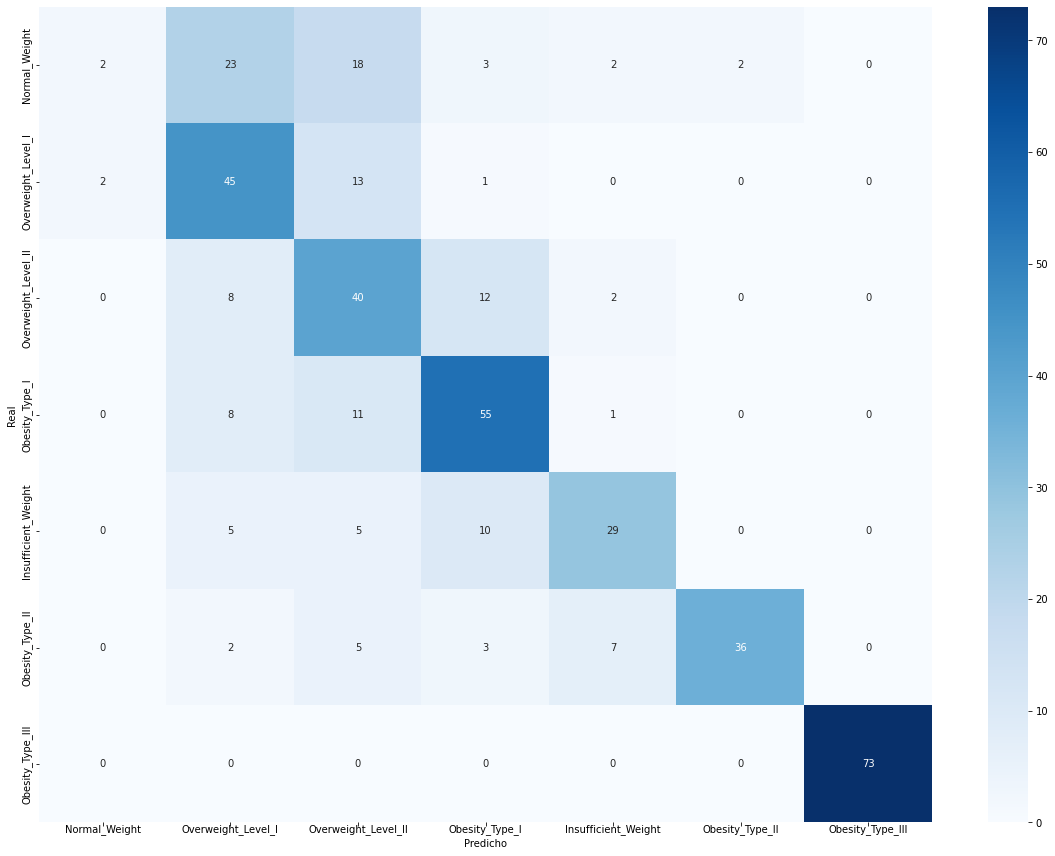

In [160]:
labels=['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III']
plt.figure(figsize=(20,15))
sns.heatmap(CM,annot=True,cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.xticks([0.5+a for a in range(7)],labels,va='center')
plt.yticks([0.5+a for a in range(7)],labels,va='center')
plt.show()

In [186]:
print(classification_report(y_test,validacion))

              precision    recall  f1-score   support

           0       0.50      0.04      0.07        50
           1       0.49      0.74      0.59        61
           2       0.43      0.65      0.52        62
           3       0.65      0.73      0.69        75
           4       0.71      0.59      0.64        49
           5       0.95      0.68      0.79        53
           6       1.00      1.00      1.00        73

    accuracy                           0.66       423
   macro avg       0.68      0.63      0.62       423
weighted avg       0.68      0.66      0.64       423



In [184]:
predicciones = modelo.predict(X = X_test)
mean_absolute_error(y_test,predicciones)

0.5802892430442708

In [185]:
r2_score(y_test,predicciones)

0.7241226386409051

In [191]:
accuracy_score(y_test,validacion)

0.6619385342789598

#### redes neuronales

In [8]:
data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [9]:
data.columns=data.columns.str.lower()


In [10]:
data.rename(columns={'family_history_with_overweight':'family'},inplace=True)

In [11]:
data.columns

Index(['gender', 'age', 'height', 'weight', 'family', 'favc', 'fcvc', 'ncp',
       'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans',
       'nobeyesdad'],
      dtype='object')

In [12]:
lista=['age','fcvc', 'ncp','ch2o', 'faf', 'tue']
for a in range(len(lista)):
    data[lista[a]]=data[lista[a]].astype(int)
    data[lista[a]]=data[lista[a]].astype(str)

In [13]:
df=data.copy()
categorical_features=['gender', 'age', 'family', 'favc', 'fcvc', 'ncp','caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans']
df_cat = pd.get_dummies(df[categorical_features])
df.drop(categorical_features, axis=1)
df = pd.concat([ df_cat,df['nobeyesdad']], axis=1)
df

,gender_Female,gender_Male,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,...,calc_Always,calc_Frequently,calc_Sometimes,calc_no,mtrans_Automobile,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking,nobeyesdad
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,Normal_Weight
1,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,Normal_Weight
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,Normal_Weight
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2107,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2108,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2109,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Obesity_Type_III


In [343]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train__y_labels = label_as_binary.fit_transform(y_train)

In [344]:
train__y_labels

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
import numpy as np
X = np.asarray(df.values[:, :-1]).astype('float32')
y = np.asarray(pd.get_dummies(df['nobeyesdad']).values).astype('float32')
print(X.shape, y.shape)

(2111, 80) (2111, 7)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(1688, 80) (1688, 7) (423, 80) (423, 7)


In [19]:
#y_train = to_categorical(y_train, 7)
#y_test = to_categorical(y_test, 7)

<Figure size 576x432 with 0 Axes>

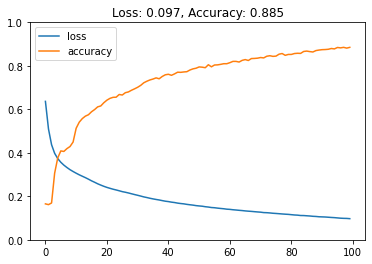

In [53]:
reg_class = Sequential()
reg_class.add(Dense(32, input_shape=(X.shape[1],), activation='tanh'))
reg_class.add(Dense(16, activation='relu'))
reg_class.add(Dense(8, activation='relu'))
reg_class.add(Dense(7, activation='softmax'))
reg_class.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = reg_class.fit(X_train, y_train,epochs=100, verbose=0)
plot_loss_accuracy(history)


In [65]:
reg_class.predict(X_test, verbose=0)

array([[5.81753454e-07, 4.08557756e-03, 6.84505358e-06, ...,
        1.73893213e-07, 2.08157487e-03, 9.93281722e-01],
       [8.07007542e-04, 9.98850107e-01, 5.33343427e-06, ...,
        8.79658444e-08, 1.39573633e-04, 1.97861358e-04],
       [4.11379653e-10, 1.03130935e-08, 6.03635755e-08, ...,
        9.99995232e-01, 4.64534924e-06, 4.11567491e-09],
       ...,
       [1.11218590e-07, 5.65165938e-05, 1.37682853e-03, ...,
        5.15409555e-11, 1.03727274e-03, 3.19659747e-02],
       [2.57549277e-12, 2.09478279e-09, 4.51770688e-07, ...,
        1.17998923e-06, 6.55224923e-08, 6.20964968e-09],
       [1.44187717e-11, 8.99378665e-06, 3.09164966e-06, ...,
        2.63972167e-13, 4.75639717e-05, 1.42658915e-04]], dtype=float32)

In [70]:
reg_class.evaluate(X_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.7470


[0.23835746943950653, 0.7470449209213257]

In [77]:
y_pred_class = reg_class.predict(X_test, verbose=0)
validacion_1=np.round(y_pred_class,0)
y_test_class = np.argmax(y_test, axis=1)


In [81]:
validacion_1[1]

array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [79]:
CM=confusion_matrix(y_test,validacion_1)

ValueError: multilabel-indicator is not supported

In [73]:
#Funciones útiles
def plot_decision_boundary(func, X, y, figsize=(9, 6)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)

def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()

def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
    
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='GnBu', alpha=0.8, vmin=0)

def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    min_epoch = len(history_list[0].epoch)
    losses = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))
        min_epoch = min(min_epoch, len(history.epoch))
        losses.append(h['loss'][-1])

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Training Loss: " + ' vs '.join([str(round(x, 3)) for x in losses]))
    
    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")
    
    plt.xlim(0, min_epoch-1)
    plt.tight_layout()
    
def make_sine_wave():
    c = 3
    num = 2400
    step = num/(c*4)
    np.random.seed(0)
    x0 = np.linspace(-c*np.pi, c*np.pi, num)
    x1 = np.sin(x0)
    noise = np.random.normal(0, 0.1, num) + 0.1
    noise = np.sign(x1) * np.abs(noise)
    x1  = x1 + noise
    x0 = x0 + (np.asarray(range(num)) / step) * 0.3
    X = np.column_stack((x0, x1))
    y = np.asarray([int((i/step)%2==1) for i in range(len(x0))])
    return X, y

def make_multiclass(N=500, D=2, K=3):
    """
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0,1,N)
        # theta
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    return X, y

3. Usando la base de testeo validar cada modelo (Uso matrices de confusión, estadísticos apropiados, curvas ROC, AUC...)

4. De acuerdo con los resultados identifico problemas como sobre ajuste y mal desempeño del modelo.

5. Si lo anterior resulta cierto aplico técnicas de regularización para estimar un modelo de clasificación adecuado.

6. Visualizamos el modelo (si es posible). 


## Infome Final

Elaboramos un informe como cuaderno de jupyter que responda la pregunta planteada en esta investigación ¿Como afectan la condición física y los hábitos alimenticios a la obesidad? 